In [1]:
import unicodecsv

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]


{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
with open('daily_engagements.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    engagements = list(reader)
    
engagements[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [3]:
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    submissions = list(reader)
    
submissions[0]


{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [4]:
from datetime import datetime as dt
#Takes a date as a string and returns a Python datetime object
#If there is no given date, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
    #Takes a string which is either and empty string or represents an integer, 
    #and returns an int or None
def parse_maybe_int(i):
        if i == '':
            return None
        else:
            return int(i)
#Clean up data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
print(enrollments[0])


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}


In [6]:
enrollments[0]


{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [7]:
for engagement_record in engagements:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited']= float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
engagements[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [8]:
#clean up submissions table
for submission in submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
    
submissions[0]

    

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [9]:
for engagement_record in engagements:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]


In [10]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [11]:
len(enrollments)

1640

In [12]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)

1302

In [13]:
len(engagements)

136240

In [14]:
unique_engagement_students = get_unique_students(engagements)
len(unique_engagement_students)

1237

In [15]:
len(submissions)

3642

In [16]:
unique_submission_students = get_unique_students(submissions)
len(unique_submission_students)

743

In [17]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break
        

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [18]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students \
        and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print enrollment
        
num_problem_students


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

In [19]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [20]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [21]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(engagements)
non_udacity_submissions = remove_udacity_accounts(submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagements)
print len(non_udacity_submissions)

1622
135656
3634


In [22]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        
        
        
len(paid_students)
#paid_students.items()






    

995

In [23]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [24]:
###################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

## Create function to remove free trial cancels
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [25]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)


1293
134549
3618


In [26]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [27]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
len(paid_engagement_in_first_week)



6919

In [28]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
    
    

In [29]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}

    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


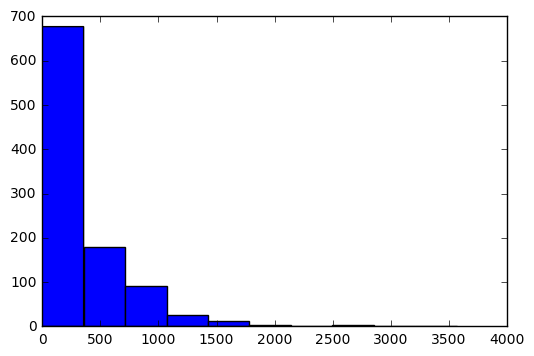

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)


total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)





In [31]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes

3564.7332644989997

In [32]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record
        

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


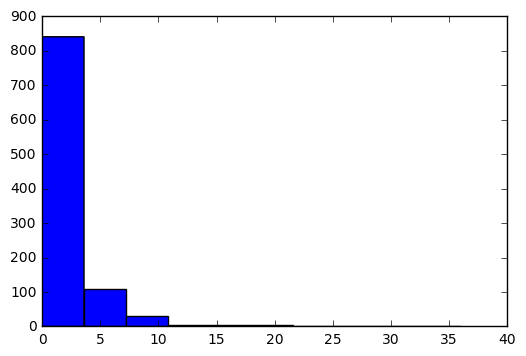

In [33]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

lessons_completed = lessons_completed_by_account.values()
describe_data(lessons_completed)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


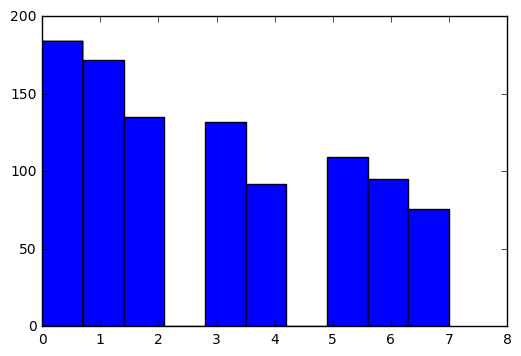

In [34]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

In [35]:
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [36]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)
        


647

In [37]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)



4527
2392


In [38]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


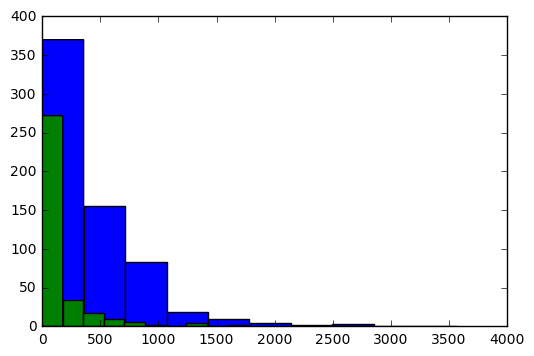

In [39]:
print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())



passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


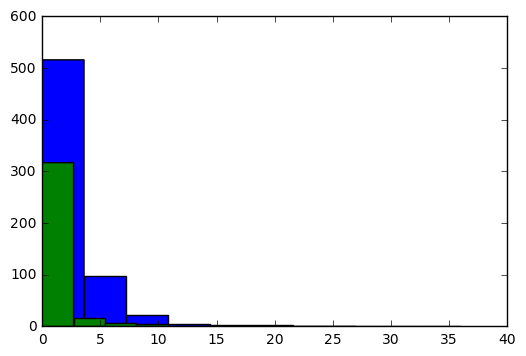

In [40]:
print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


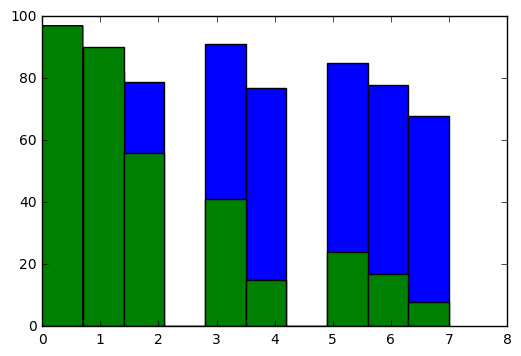

In [41]:
print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

In [42]:
#



(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

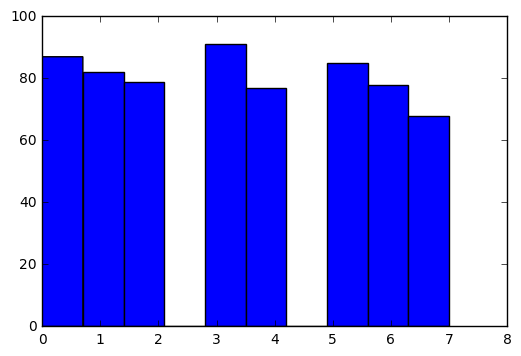

In [43]:
plt.hist(passing_visits.values())

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

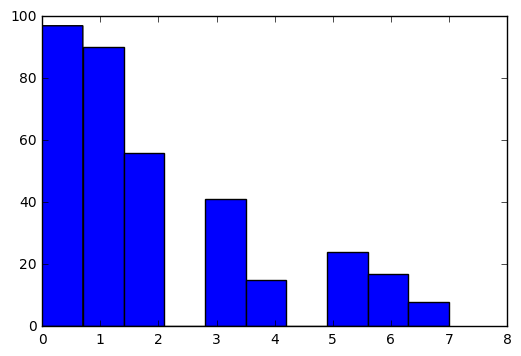

In [44]:
plt.hist(non_passing_visits.values())

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

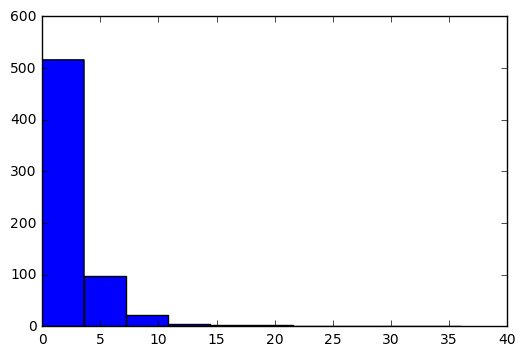

In [45]:
plt.hist(passing_lessons.values())

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

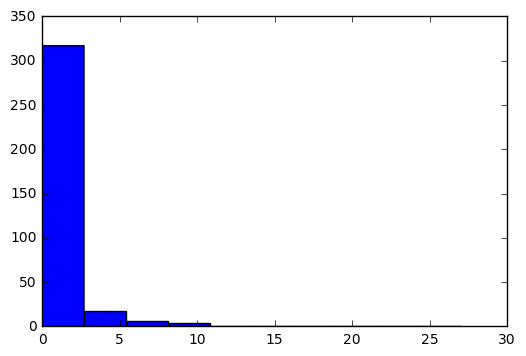

In [46]:
plt.hist(non_passing_lessons.values())

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

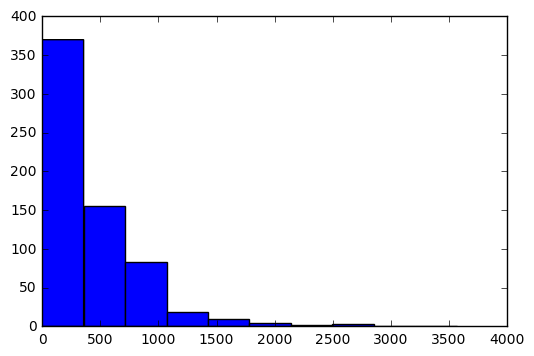

In [47]:
plt.hist(passing_minutes.values())

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

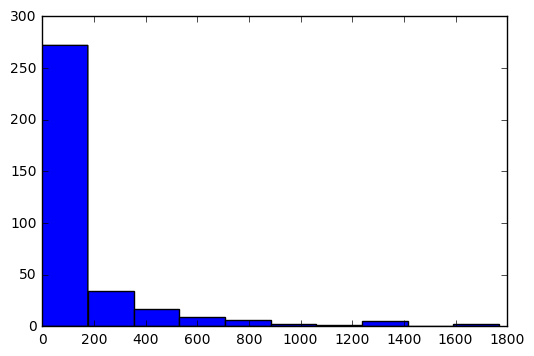

In [48]:
plt.hist(non_passing_minutes.values())